In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import requests
import json
from appid import api_key
from pprint import pprint
from citipy import citipy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
# Create empty lists of longitudes and latitudes
lat = []
lng = []

# Generate 1500 randon latitudes south(lat -75) and north(lat 75) of the equator and add them to the list
for x in np.random.randint(-75,75,1500):
    lat.append(x)

# Generate 1500 randon longitudes west(lon -165) and east(lon 165) of the prime meridian and add them to the list
for y in np.random.randint(-165,165,1500):
    lng.append(y)

# zip together the two lists to obtain pairs of longitude & latitudes in a tuple
lat_lng = tuple(zip(lat,lng))
#print(lat_lng)

In [3]:
# Create empty list of cities
cities = []

# Use for loop to get the nearest city to each lat_lng pair in tuple
for x, y in lat_lng:
    city = citipy.nearest_city(x, y)
    cityName = city.city_name
    
    # Add city name to list
    cities.append(cityName)

In [4]:
# Creat empty lists of temperature, humidity, cloudiness and wind speed
temp = []
hum = []
cloud = []
windsp = []


In [5]:
# Create a dictionary of the cities, lat, and lng ...
weather_dict = {
    'City ID': "",
    'City Name': cities,
    'Latitude': lat,
    'Longitude': lng
}

# ... and covert the dict into a dataframe with 3 columns and 1500 rows
weather_data = pd.DataFrame(weather_dict)
weather_data

,City ID,City Name,Latitude,Longitude
0,,cayenne,11,-42
1,,kuche,40,84
2,,albany,-52,109
3,,rikitea,-53,-140
4,,los llanos de aridane,28,-26
...,...,...,...,...
1495,,sault sainte marie,47,-84
1496,,jamestown,-15,1
1497,,albany,-74,104
1498,,atuona,-10,-116


In [6]:
# Create new columns for the other variables in the dataframe using df.loc[]
weather_data.loc[:,'Temperature (F)'] = ""
weather_data.loc[:,'Humidity (%)'] = ""
weather_data.loc[:,'Cloudiness (%)'] = ""
weather_data.loc[:,'Wind Speed (mph)'] = ""

weather_data

,City ID,City Name,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,,cayenne,11,-42,,,,
1,,kuche,40,84,,,,
2,,albany,-52,109,,,,
3,,rikitea,-53,-140,,,,
4,,los llanos de aridane,28,-26,,,,
...,...,...,...,...,...,...,...,...
1495,,sault sainte marie,47,-84,,,,
1496,,jamestown,-15,1,,,,
1497,,albany,-74,104,,,,
1498,,atuona,-10,-116,,,,


In [7]:
# define the base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" # To get the temperatures in Fahrenheit (F)


# Build partial query url
query_url = f"{base_url}appid={api_key}&units={units}&q="

# Create an empty list to collect names of cities the data is collected on for reference porposes
cityList = []

# loop through list of cities to obtain the required data for each city
for index, row in weather_data.iterrows():
    
    # get city name from dataframe
    citiName = row['City Name']
    
    
    # perform API Call
    response = requests.get(query_url + citiName).json()

    # Use 'try . . . except' to skip through the results for the cities and pull the data'
    try:
        weather_data.loc[index, 'City ID'] = response['id']
        weather_data.loc[index, 'Latitude'] = response['coord']['lat']
        weather_data.loc[index, 'Longitude'] = response['coord']['lon']
        weather_data.loc[index, 'Temperature (F)'] = response['main']['temp']
        weather_data.loc[index, 'Humidity (%)'] = response['main']['humidity']
        weather_data.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        weather_data.loc[index, 'Wind Speed (mph)'] = response['wind']['speed']
        cityList.append(citiName)
        
    except (KeyError, IndexError): 
        print("City is missing complete weather data...skip")
        

City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is missing complete weather data...skip
City is mi

In [8]:
# Visually inspect the data collected
weather_data.head()

,City ID,City Name,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,3382160,cayenne,4.9333,-52.3333,77.59,94,90,5.75
1,,kuche,40.0000,84.0000,,,,
2,5106841,albany,42.6001,-73.9662,55.89,89,88,2.55
3,4030556,rikitea,-23.1203,-134.9692,75.83,69,74,9.8
4,2514651,los llanos de aridane,28.6585,-17.9182,64.4,63,0,3.44


In [9]:
# Check data types
weather_data.dtypes

City ID              object
City Name            object
Latitude            float64
Longitude           float64
Temperature (F)      object
Humidity (%)         object
Cloudiness (%)       object
Wind Speed (mph)     object
dtype: object

In [11]:
# Convert tenp, humidity, cloudiness, and wind speed data to float
weather_data['City ID'] = pd.to_numeric(weather_data['City ID'])
weather_data['Temperature (F)'] = pd.to_numeric(weather_data['Temperature (F)'])
weather_data['Humidity (%)'] = pd.to_numeric(weather_data['Humidity (%)'])
weather_data['Cloudiness (%)'] = pd.to_numeric(weather_data['Cloudiness (%)'])
weather_data['Wind Speed (mph)'] = pd.to_numeric(weather_data['Wind Speed (mph)'])

# Check data types again
weather_data.dtypes

City ID             float64
City Name            object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
dtype: object

In [12]:
# Get a count of data values to check for potential missing data
weather_data.count()


City ID             1404
City Name           1500
Latitude            1500
Longitude           1500
Temperature (F)     1404
Humidity (%)        1404
Cloudiness (%)      1404
Wind Speed (mph)    1404
dtype: int64

In [13]:
# Drop rows with null values
weather_df = weather_data.dropna(axis=0, how='any')

# Verify count again
weather_df.count()

City ID             1404
City Name           1404
Latitude            1404
Longitude           1404
Temperature (F)     1404
Humidity (%)        1404
Cloudiness (%)      1404
Wind Speed (mph)    1404
dtype: int64

In [14]:
#Check for any duplicated cities, check on city ID and name, lat & lon
duplicate_cities = weather_df[weather_data.duplicated(['City ID','City Name','Latitude','Longitude'], keep=False)]
duplicate_cities.sort_values(by=['City Name'])
print("Duplicate cities based on City ID & name, Latitude and Longitude are:", duplicate_cities, sep='\n')

Duplicate cities based on City ID & name, Latitude and Longitude are:
        City ID  City Name  Latitude  Longitude  Temperature (F)  \
2     5106841.0     albany   42.6001   -73.9662            55.89   
3     4030556.0    rikitea  -23.1203  -134.9692            75.83   
6     2629833.0    husavik   66.0449   -17.3389            24.80   
7     2281120.0      tabou    4.4230    -7.3528            78.46   
8     1490256.0    talnakh   69.4865    88.3972            33.49   
...         ...        ...       ...        ...              ...   
1494  3466165.0   cidreira  -30.1811   -50.2056            62.26   
1496  5122534.0  jamestown   42.0970   -79.2353            62.60   
1497  5106841.0     albany   42.6001   -73.9662            55.89   
1498  4020109.0     atuona   -9.8000  -139.0333            79.61   
1499  6050066.0   la ronge   55.1001  -105.2842            28.40   

      Humidity (%)  Cloudiness (%)  Wind Speed (mph)  
2             89.0            88.0              2.55  
3  

C:\Users\yu_ka\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [15]:
# Drop duplicates and keep first
weatherData = weather_df.drop_duplicates(subset=['City ID','City Name','Latitude','Longitude'], keep='first')

# Final count of cities
weatherData.count()

City ID             672
City Name           672
Latitude            672
Longitude           672
Temperature (F)     672
Humidity (%)        672
Cloudiness (%)      672
Wind Speed (mph)    672
dtype: int64

* The final DataFrame has 672 cities and I will now save this to complete the rest of the project

In [16]:
# Save the dataframe as a csv file
weatherData.to_csv("Data/Weather_Data.csv")

## Scatter Plots

In [18]:
# First load the saved dataframe
df = pd.read_csv('Data/Weather_Data.csv')

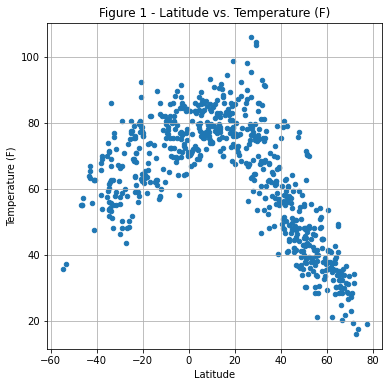

In [20]:
# 1. Temperature (F) Vs Latitude
df.plot.scatter(x='Latitude', y='Temperature (F)', grid=True, figsize=(6,6), title='Figure 1 - Latitude vs. Temperature (F)')
plt.savefig("Images/fig1.png")

### Temperature (F)

To understand the relationship between a city's temperature and its latitude, it is important to first understand how a city's latitude helps understand its distance from the equator (Latitude 0). First off, cities with negative latitudes lie below the equator, i.e in the southern hemisphere and cities with a positive latitude are above the equator, i.e. the northern hemisphere. The higher the absolute value of a city's latitude, the farther it is away from the equator, and vice vers. 

We see from the scatter plot that temperatures rise as we approach zero (i.e. the equator) from both the negative and positive sides. Hence the graph shows that cities that are closer to the equator are hotter than those that are farther from it. This is something I always knew but to be able to actually analyze the data and show the relationship like this is really cool.

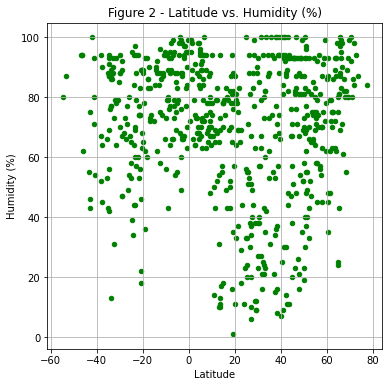

In [21]:
# 2. Humidity (%) Vs Latitude
df.plot.scatter(x='Latitude', y='Humidity (%)',grid=True, color='g', figsize=(6,6), title='Figure 2 - Latitude vs. Humidity (%)')
plt.savefig("Images/fig2.png")

### Humidity (%)

Humidity, a measure, as a percentage, of the amount of water in the atmosphere, does not appear to show any consistent pattern in relation to a city's distance from the equator. As the graph shows, we cities on either side of the equator both near and far that have both low and high humidity levels. 

However, one thing that is clear is that most of the cities in the sample have humidity levels of 60% or higher.

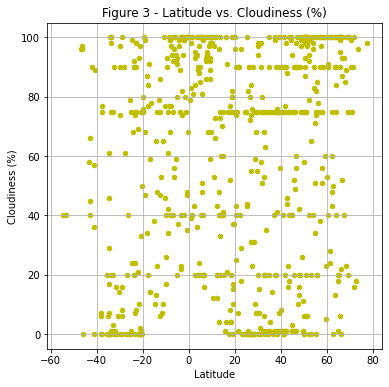

In [22]:
# 3. Cloudiness (%) Vs Latitude
df.plot.scatter(x='Latitude', y='Cloudiness (%)', grid=True, color='y', figsize=(6,6), title='Figure 3 - Latitude vs. Cloudiness (%)')
plt.savefig("Images/fig3.png")

### Cloudiness (%)
AS the graph shows, there appears to be no clear pattern between the amount of clouds in a city and its distance from the equator. We have cities of varying distances from the equator with 0%, 20%, 40% up to 100% clouds.

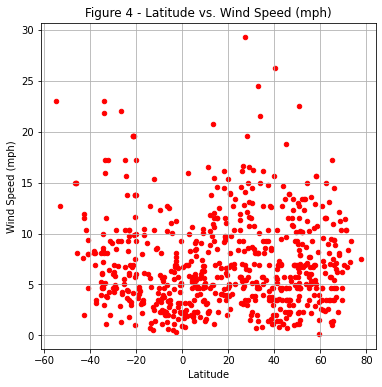

In [23]:
# 4. Wind Speed (mpg) Vs Latitude
df.plot.scatter(x='Latitude', y='Wind Speed (mph)', grid=True, color='r', figsize=(6,6), title='Figure 4 - Latitude vs. Wind Speed (mph)')
plt.savefig("Images/fig4.png")

### Wind Speed (mph)
As with humidity and cloudiness, wind speed does not appear to have any significant relationship with a city's distance from the equator. There appears to be a slight positve relationship between wind speed and distance from the equator for cities in the northern hemisphere, however, this does not appear to be be significant either.

One thing that is clear from the plot is that more cities are clustered between the 0mph - 15mph range, spanning varying distances from the equator from both hemispheres.

In [24]:
# Divide the dataframe into the northern (+ve lat) and southern (-ve lat) hemispheres
North_df = df[df['Latitude'] >= 0]
South_df = df[df['Latitude'] < 0]

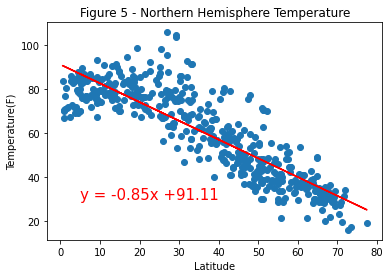

In [26]:
#Northern Hemisphere - Temperature (F) vs. Latitude

# Define the x and y variables
X = North_df.loc[:,'Latitude'].values.reshape(-1, 1)
Y = North_df.loc[:,'Temperature (F)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = North_df.loc[:,'Latitude']
temp = North_df.loc[:,'Temperature (F)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (5,30), fontsize=15, color="r")
plt.ylabel('Temperature(F)')
plt.xlabel('Latitude')
plt.title('Figure 5 - Northern Hemisphere Temperature')
plt.savefig("Images/fig5.png")
plt.show()

### Northern Hemisphere Temperature
Figure 5, which as we can see is a half of Figure 1, shows a negative relationship between temperatures and distance from the equator. This is shown by a negatively sloped regression line and equation. This means, cities closer to the north pole have lower temperatures and these temperatures increase as we move down closer toward the equator.

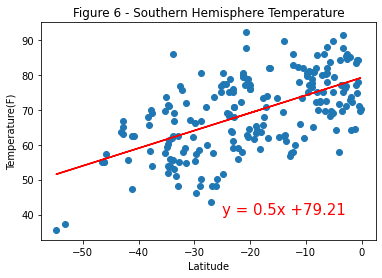

In [28]:
#Southern Hemisphere - Temperature (F) vs. Latitude

# Define the x and y variables
X = South_df.loc[:,'Latitude'].values.reshape(-1, 1)
Y = South_df.loc[:,'Temperature (F)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = South_df.loc[:,'Latitude']
temp = South_df.loc[:,'Temperature (F)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (-25,40), fontsize=15, color='r')
plt.ylabel('Temperature(F)')
plt.xlabel('Latitude')
plt.title('Figure 6 - Southern Hemisphere Temperature')
plt.savefig("Images/fig6.png")
plt.show()

### Southern Hemisphere Temperature
This graph represent the cities from the southern half and it shows a positive relationship between temperatures and distance from the equator. This means, countries closer to the south pole have lower temperatures and the temperatures increase as we move away from the southpole towards the equator. The positively sloped regression line emphasizes this relationship.

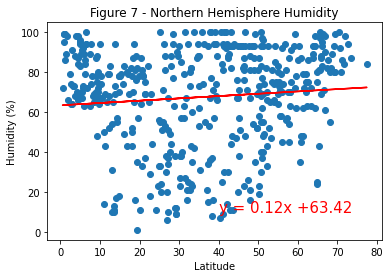

In [29]:
#Northern Hemisphere - Humidity (%) vs. Latitude

# Define the x and y variables
X = North_df.loc[:,'Latitude'].values.reshape(-1, 1)
Y = North_df.loc[:,'Humidity (%)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = North_df.loc[:,'Latitude']
hum = North_df.loc[:,'Humidity (%)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (40,10), fontsize=15, color='r')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Figure 7 - Northern Hemisphere Humidity')
plt.savefig("Images/fig7.png")
plt.show()

### Northern Hemisphere Humidity
Isolating the northern hemisphere humidity from the south, we see a slightly positive relationship between humidity and distance from the equator. However, this is a very weak relationship as shown by the relatively flat regression line. It is also clear as seen in figure 2 that there is a high concentration of cities with high levels of humidity.

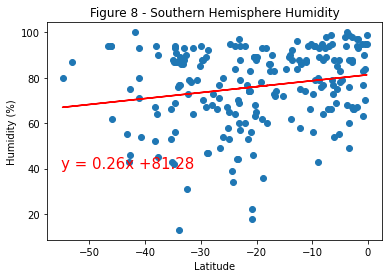

In [30]:
#Southern Hemisphere - Humidity (%) vs. Latitude

# Define the x and y variables
X = South_df.loc[:,'Latitude'].values.reshape(-1, 1)
Y = South_df.loc[:,'Humidity (%)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = South_df.loc[:,'Latitude']
hum = South_df.loc[:,'Humidity (%)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (-55,40), fontsize=15, color="r")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Figure 8 - Southern Hemisphere Humidity')
plt.savefig("Images/fig8.png")
plt.show()

### Southern Hemisphere Humidity
As with the north, we see a slightly positive relationship between humidity and distance from the equator for cities in the southern hemisphere. Again this relation is very weak as shown by the line of best-fit, and more cities fall in the high humidity range.

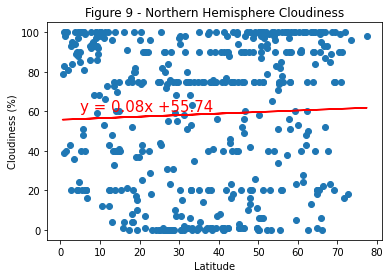

In [31]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude

# Define the x and y variables
X = North_df.loc[:,'Latitude'].values.reshape(-1, 1)
Y = North_df.loc[:,'Cloudiness (%)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = North_df.loc[:,'Latitude']
cloud = North_df.loc[:,'Cloudiness (%)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (5,60), fontsize=15, color='r')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Figure 9 - Northern Hemisphere Cloudiness')
plt.savefig("Images/fig9.png")
plt.show()

### Northen Hemisphere Cloudiness
Looking aat the scatter plot, it is almost impossible to discern any clear correlation, positive or negative, between cloudiness and distance from the equator. However, the fitted line shows a very weak positive relationship.

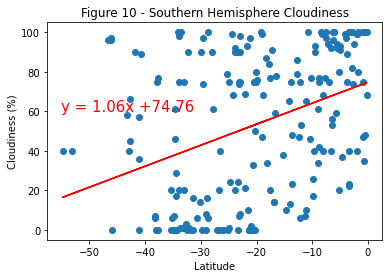

In [33]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude

# Define the x and y variables
X = South_df.loc[:,'Latitude'].values.reshape(-1, 1)
Y = South_df.loc[:,'Cloudiness (%)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = South_df.loc[:,'Latitude']
cloud = South_df.loc[:,'Cloudiness (%)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (-55,60), fontsize=15, color='r')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Figure 10 - Southern Hemisphere Cloudiness')
plt.savefig("Images/fig10.png")
plt.show()

### Southern Hemisphere Cloudiness
We see a much stronger positive relationship between cloudiness and distance from the origin for cities in the southern hemisphere. The relationship is relatively much stronger in the south compared to the north as shown by the regression slope.


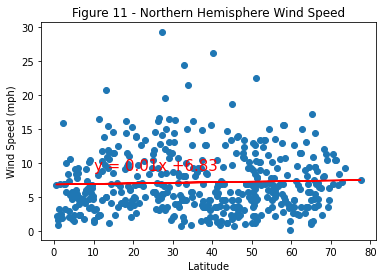

In [34]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude

# Define the x and y variables
X = North_df.loc[:,'Latitude'].values.reshape(-1, 1)
Y = North_df.loc[:,'Wind Speed (mph)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = North_df.loc[:,'Latitude']
wind = North_df.loc[:,'Wind Speed (mph)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (10,9), fontsize=15, color='r')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Figure 11 - Northern Hemisphere Wind Speed')
plt.savefig("Images/fig11.png")
plt.show()

### Northern Hemisphere Wind Speed
The regression line shows that for cities in the northern hemisphere, their distance from the equator has no effect on the wind speed. This reinforces what is clearly apparent from the scatter as the regression line has an almost zero slope. Thus there could be a potential third factor or set of factors responsible for the differences in wind speed.

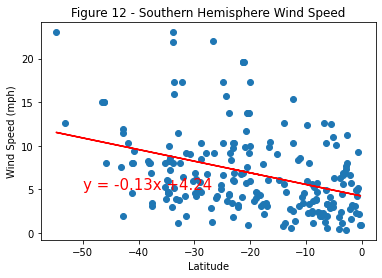

In [35]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

# Define the x and y variables
X = South_df.loc[:,'Latitude'].values.reshape(-1, 1)
Y = South_df.loc[:,'Wind Speed (mph)'].values.reshape(-1, 1)

#Fit the lr line
lr = LinearRegression()
lr.fit(X, Y)
Y_pred = lr.predict(X)

# get x, y values to calculate the regression parameters
lat = South_df.loc[:,'Latitude']
wind = South_df.loc[:,'Wind Speed (mph)']

# calculate the parameters and get the regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))

#Visualize the results in a scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='r')
plt.annotate(line_eq, (-50,5), fontsize=15, color='r')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Figure 12 - Southern Hemisphere Wind Speed')
plt.savefig("Images/fig12.png")
plt.show()

### Southern Hemisphere Wind Speed
Unlike the north, there appears to be a slightly negative relationship between wind speed and distance from the equator for cities in the southern hemisphere. However, the relstionship is very weak and is almost negligible.

In [38]:
print(f"The cities included in the study are: ")
print(f"-----------------------------------------")
print((df["City Name"]).to_string(index=False))

The cities included in the study are: 
-----------------------------------------
                    cayenne
                     albany
                    rikitea
      los llanos de aridane
                     kigali
                    husavik
                      tabou
                    talnakh
                    magadan
                   mokobeng
                     hasaki
                   tasiilaq
                     beloha
                     nsanje
                beaverlodge
                    prieska
                      yumen
                     tiznit
                     castro
               umm kaddadah
                    ushuaia
             guerrero negro
                  tuatapere
                    baoqing
                  esperance
                  qixingtai
                   yinchuan
                     tevriz
                     barrow
                  jamestown
               port augusta
                   cidreira
                  cape 